In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from nltk import download
from nltk.corpus import stopwords

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('toyota.csv')
df.head()

model  year  price transmission  mileage fuelType  tax   mpg  engineSize
0   GT86  2016  16000       Manual    24089   Petrol  265  36.2         2.0
1   GT86  2017  15995       Manual    18615   Petrol  145  36.2         2.0
2   GT86  2015  13998       Manual    27469   Petrol  265  36.2         2.0
3   GT86  2017  18998       Manual    14736   Petrol  150  36.2         2.0
4   GT86  2017  17498       Manual    36284   Petrol  145  36.2         2.0

In [3]:
df.describe()

year         price        mileage          tax          mpg  \
count  6738.000000   6738.000000    6738.000000  6738.000000  6738.000000   
mean   2016.748145  12522.391066   22857.413921    94.697240    63.042223   
std       2.204062   6345.017587   19125.464147    73.880776    15.836710   
min    1998.000000    850.000000       2.000000     0.000000     2.800000   
25%    2016.000000   8290.000000    9446.000000     0.000000    55.400000   
50%    2017.000000  10795.000000   18513.000000   135.000000    62.800000   
75%    2018.000000  14995.000000   31063.750000   145.000000    69.000000   
max    2020.000000  59995.000000  174419.000000   565.000000   235.000000   

        engineSize  
count  6738.000000  
mean      1.471297  
std       0.436159  
min       0.000000  
25%       1.000000  
50%       1.500000  
75%       1.800000  
max       4.500000

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6738 entries, 0 to 6737
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         6738 non-null   object 
 1   year          6738 non-null   int64  
 2   price         6738 non-null   int64  
 3   transmission  6738 non-null   object 
 4   mileage       6738 non-null   int64  
 5   fuelType      6738 non-null   object 
 6   tax           6738 non-null   int64  
 7   mpg           6738 non-null   float64
 8   engineSize    6738 non-null   float64
dtypes: float64(2), int64(4), object(3)
memory usage: 473.9+ KB


In [5]:
df.duplicated().any()

True

In [6]:
df = df.drop_duplicates().reset_index(drop=True)
df

model  year  price transmission  mileage fuelType  tax   mpg  \
0               GT86  2016  16000       Manual    24089   Petrol  265  36.2   
1               GT86  2017  15995       Manual    18615   Petrol  145  36.2   
2               GT86  2015  13998       Manual    27469   Petrol  265  36.2   
3               GT86  2017  18998       Manual    14736   Petrol  150  36.2   
4               GT86  2017  17498       Manual    36284   Petrol  145  36.2   
...              ...   ...    ...          ...      ...      ...  ...   ...   
6694              IQ  2011   5500    Automatic    30000   Petrol   20  58.9   
6695   Urban Cruiser  2011   4985       Manual    36154   Petrol  125  50.4   
6696   Urban Cruiser  2012   4995       Manual    46000   Diesel  125  57.6   
6697   Urban Cruiser  2011   3995       Manual    60700   Petrol  125  50.4   
6698   Urban Cruiser  2011   4495       Manual    45128   Petrol  125  50.4   

      engineSize  
0            2.0  
1            2.0  
2            2.0  
3            2.0  
4            2.0  
...          ...  
6694         1.0  
6695         1.3  
6696         1.4  
6697         1.3  
6698         1.3  

[6699 rows x 9 columns]

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6699 entries, 0 to 6698
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         6699 non-null   object 
 1   year          6699 non-null   int64  
 2   price         6699 non-null   int64  
 3   transmission  6699 non-null   object 
 4   mileage       6699 non-null   int64  
 5   fuelType      6699 non-null   object 
 6   tax           6699 non-null   int64  
 7   mpg           6699 non-null   float64
 8   engineSize    6699 non-null   float64
dtypes: float64(2), int64(4), object(3)
memory usage: 471.1+ KB


In [8]:
price = []
for i in df['price']:
  if 0 <= i <= 20000:
    price.append('cheap')
  elif 20001 <= i <= 40000:
    price.append('middle')
  else:
    price.append('expensive')

df['price_category'] = price

In [9]:
df.head()

model  year  price transmission  mileage fuelType  tax   mpg  engineSize  \
0   GT86  2016  16000       Manual    24089   Petrol  265  36.2         2.0   
1   GT86  2017  15995       Manual    18615   Petrol  145  36.2         2.0   
2   GT86  2015  13998       Manual    27469   Petrol  265  36.2         2.0   
3   GT86  2017  18998       Manual    14736   Petrol  150  36.2         2.0   
4   GT86  2017  17498       Manual    36284   Petrol  145  36.2         2.0   

  price_category  
0          cheap  
1          cheap  
2          cheap  
3          cheap  
4          cheap

In [10]:
download('stopwords')

stop = stopwords.words('indonesian')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/rangga/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [11]:
stop.extend([' '])

In [12]:
df['model'] = df['model'].str.lower()
df['year'] = [str(year) for year in df['year']]
df['transmission'] = df['transmission'].str.lower()
df['fuelType'] = df['fuelType'].str.lower()

df['model'] = df['model'].apply(
    lambda x: ' '.join([word for word in x.split()
    if word not in (stop)]))

In [13]:
df['transmission'].unique()

array(['manual', 'automatic', 'semi-auto', 'other'], dtype=object)

In [14]:
df['fuelType'].unique()

array(['petrol', 'other', 'hybrid', 'diesel'], dtype=object)

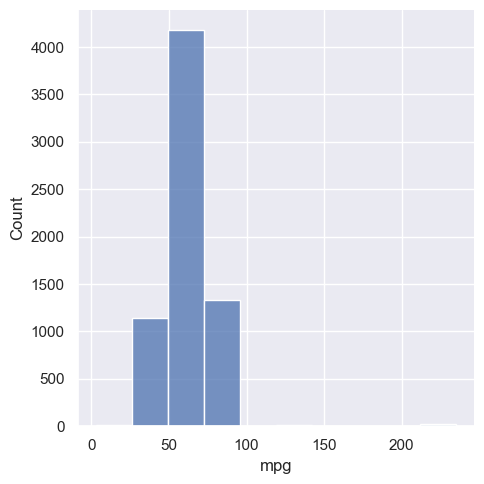

In [15]:
sns.set(rc={'figure.figsize':(11.7, 8.27)})

sns.displot(df['mpg'], bins=10)

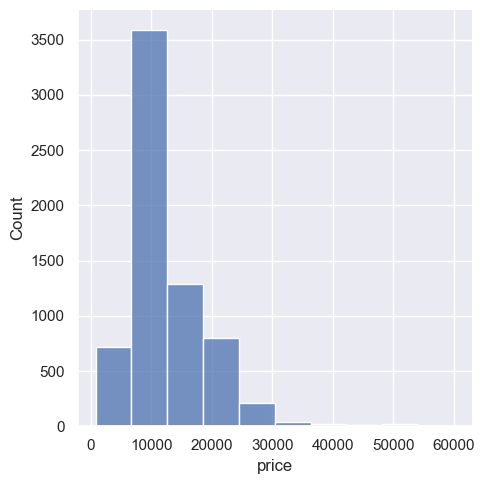

In [16]:
sns.set(rc={'figure.figsize':(11.7, 8.27)})

sns.displot(df['price'], bins=10)

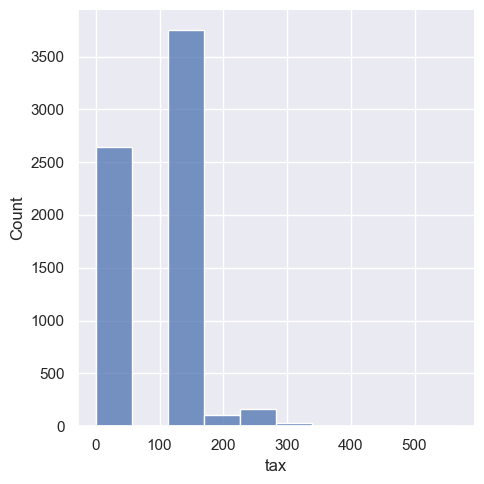

In [17]:
sns.set(rc={'figure.figsize':(11.7, 8.27)})

sns.displot(df['tax'], bins=10)

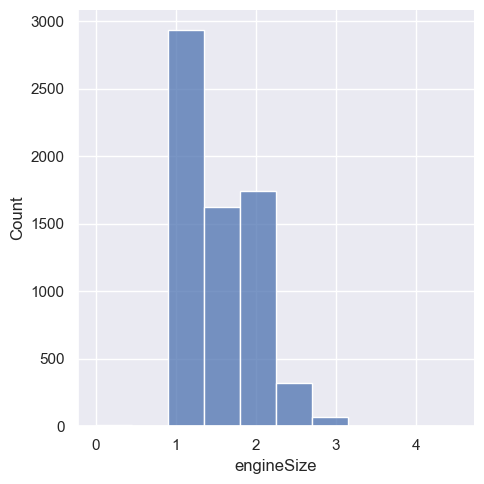

In [18]:
sns.set(rc={'figure.figsize':(11.7, 8.27)})

sns.displot(df['engineSize'], bins=10)

Cheap : 5840
middle : 823
expensive : 36


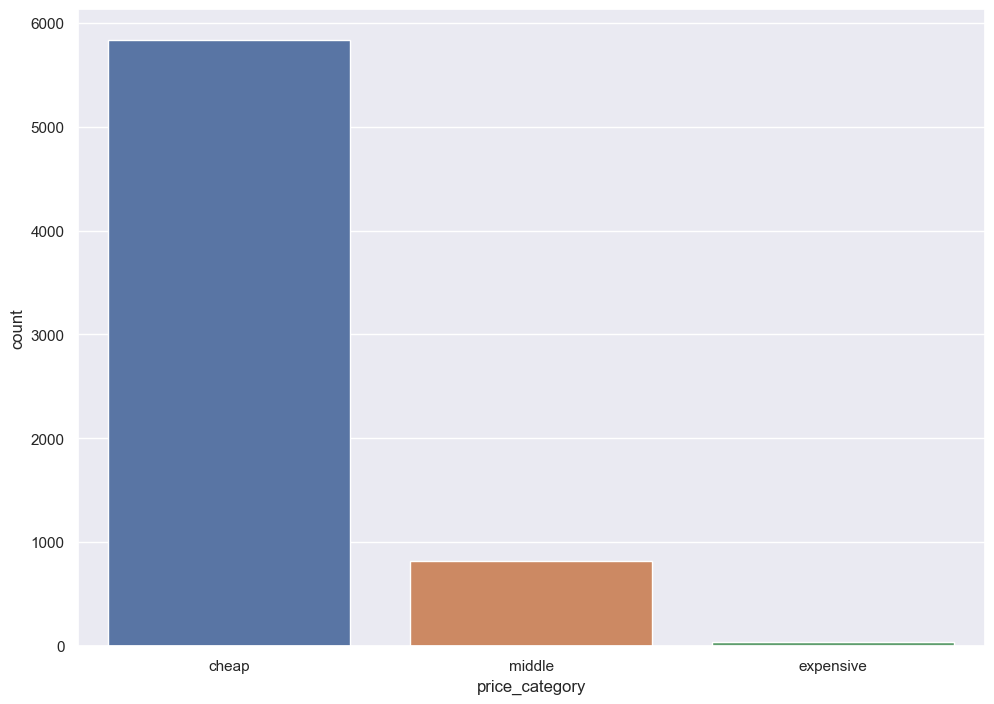

In [19]:
sns.set(rc={'figure.figsize':(11.7, 8.27)})

sns.countplot(x='price_category', data=df)

print(f"Cheap : {df['price_category'].value_counts()[0]}")
print(f"middle : {df['price_category'].value_counts()[1]}")
print(f"expensive : {df['price_category'].value_counts()[2]}")

plt.show()

### Terjadi Unbalance Data

In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn import preprocessing

In [21]:
le = preprocessing.LabelEncoder()

df['model'] = le.fit_transform(df['model'])
df['year'] = le.fit_transform(df['year'])
df['transmission'] = le.fit_transform(df['transmission'])
df['fuelType'] = le.fit_transform(df['fuelType'])

In [22]:
df 

model  year  price  transmission  mileage  fuelType  tax   mpg  \
0         6    18  16000             1    24089         3  265  36.2   
1         6    19  15995             1    18615         3  145  36.2   
2         6    17  13998             1    27469         3  265  36.2   
3         6    19  18998             1    14736         3  150  36.2   
4         6    19  17498             1    36284         3  145  36.2   
...     ...   ...    ...           ...      ...       ...  ...   ...   
6694      8    13   5500             0    30000         3   20  58.9   
6695     14    13   4985             1    36154         3  125  50.4   
6696     14    14   4995             1    46000         0  125  57.6   
6697     14    13   3995             1    60700         3  125  50.4   
6698     14    13   4495             1    45128         3  125  50.4   

      engineSize price_category  
0            2.0          cheap  
1            2.0          cheap  
2            2.0          cheap  
3            2.0          cheap  
4            2.0          cheap  
...          ...            ...  
6694         1.0          cheap  
6695         1.3          cheap  
6696         1.4          cheap  
6697         1.3          cheap  
6698         1.3          cheap  

[6699 rows x 10 columns]

In [23]:
X = df.drop(columns=['price_category', 'price'])
y = df['price_category']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 22)

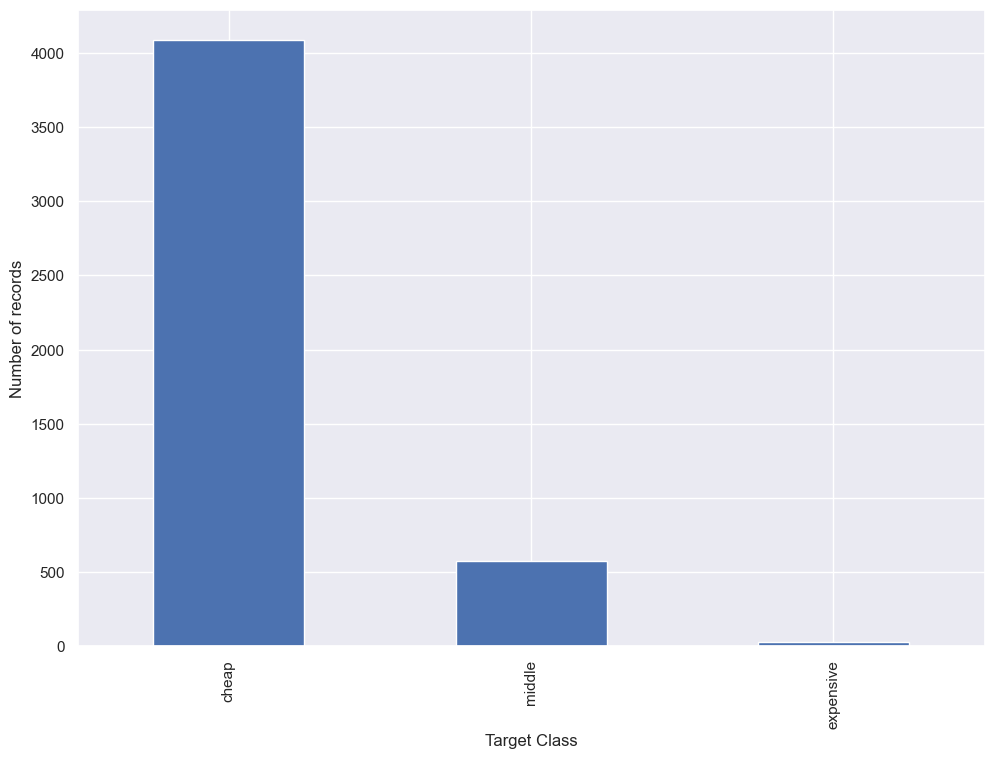

In [25]:
count = y_train.value_counts()
count.plot.bar()
plt.ylabel('Number of records')
plt.xlabel('Target Class')
plt.show()

In [26]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       cheap       0.89      0.97      0.93      1752
   expensive       0.50      0.14      0.22         7
      middle       0.43      0.16      0.24       251

    accuracy                           0.87      2010
   macro avg       0.61      0.43      0.46      2010
weighted avg       0.83      0.87      0.84      2010



In [27]:
n_samples = count.mode().astype(np.int64)

In [28]:
def sampling_strategy(X,y,n_samples):
    target_classes = y.value_counts() < n_samples
    tc = target_classes[target_classes == True].index
    #target_classes_all = y.value_counts().index
    sampling_strategy = {}
    for target in tc:
        sampling_strategy[target] = n_samples
    return sampling_strategy

In [29]:
from imblearn.over_sampling import SMOTE
over_sampler = SMOTE(sampling_strategy='not majority', k_neighbors=2)
X_over, y_over = over_sampler.fit_resample(X_train, y_train)

In [32]:
from sklearn.utils import class_weight
classes = np.unique(y_over)
cw = class_weight.compute_class_weight(class_weight='balanced', classes=classes, y=y_over)
weights = dict(zip(classes,cw))

In [33]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(class_weight=weights)
tree.fit(X_over, y_over)
y_predict = tree.predict(X_test)

print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

       cheap       0.98      0.98      0.98      1752
   expensive       0.75      0.86      0.80         7
      middle       0.84      0.85      0.84       251

    accuracy                           0.96      2010
   macro avg       0.85      0.89      0.87      2010
weighted avg       0.96      0.96      0.96      2010



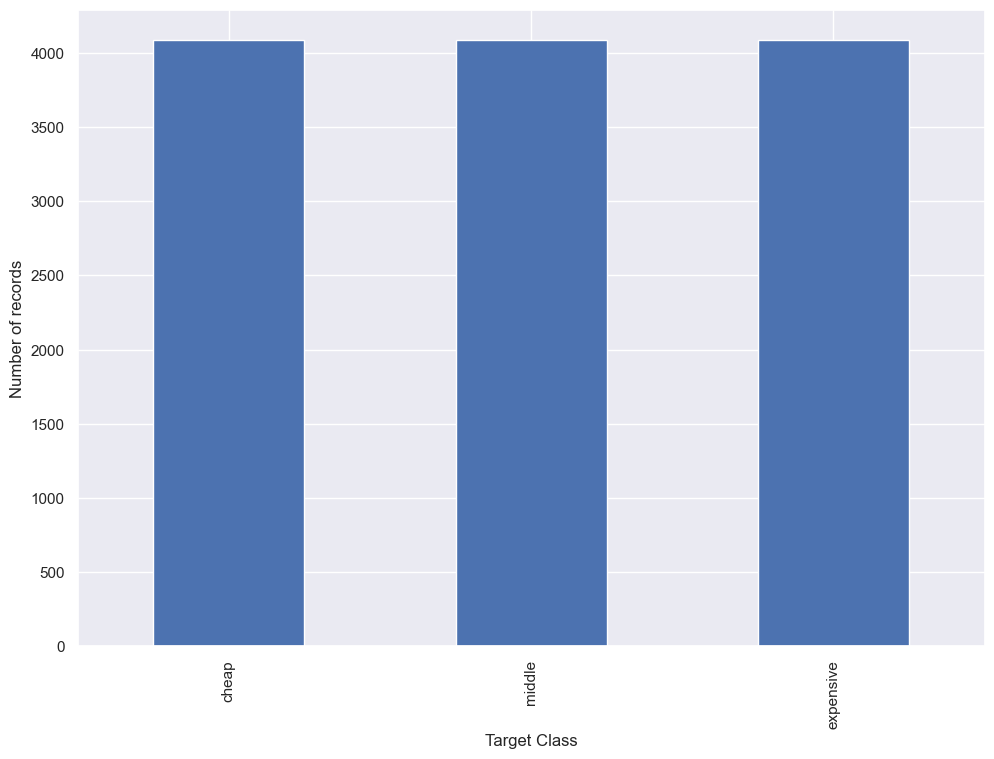

In [34]:
new_count = y_over.value_counts()
new_count.plot.bar()
plt.ylabel('Number of records')
plt.xlabel('Target Class')
plt.show()

In [35]:
from joblib import dump

dump(tree, 'Model_toyota.pkl')

['Model_toyota.pkl']

In [42]:
!streamlit run harga_mobil.py


  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://192.168.100.202:8501

^C
  Stopping...
